In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

### Read in the relevant data-sets...

In [2]:
league = 'epl'
season = 2223

def xg_dataset(league, season):
    file_path = f'./data/shotstats_{league}_{season}.csv'
    df = pd.read_csv(file_path, index_col=0, header=1)
    return df

In [3]:
epl_2223 = xg_dataset('epl', 2223)

ligue1_2223 = xg_dataset('ligue1', 2223)

laliga_2223 = xg_dataset('laliga', 2223)

serieA_2223 = xg_dataset('seriea', 2223)

bund_2223 = xg_dataset('bundesliga', 2223)

In [4]:
epl_2223.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'xG\n▼', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'],
      dtype='object')

### Adding a column to define each league, concat each DF, and add a 'season' column

In [5]:
epl_2223['League'] = 'English Premier League'
laliga_2223['League'] = 'La Liga (Spain)'
serieA_2223['League'] = 'Serie A (Italy)'
bund_2223['League'] = 'Bundesliga (Germany)'
ligue1_2223['League'] = 'Ligue 1 (France)'

xg_all = pd.concat([epl_2223, laliga_2223, serieA_2223, bund_2223, ligue1_2223], ignore_index=True)

xg_all['Season']='2022/3'

### Tidy the xG column name (currently showing the sort arrow)

In [6]:
xg_all['xG'] = xg_all['xG\n▼']

In [7]:
xg_all= xg_all[['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'League',
       'Season']]

### Simplify the Nation column values

In [8]:
xg_all['Nation'].unique()

array(['no NOR', 'eg EGY', 'eng ENG', 'rs SRB', 'br BRA', 'ar ARG',
       'uy URU', 'de GER', 'kr KOR', 'cm CMR', 'pt POR', 'wls WAL',
       'se SWE', 'jp JPN', 'es ESP', 'py PAR', 'ng NGA', 'dz ALG',
       'sct SCO', 'jm JAM', 'ci CIV', 'nl NED', 'fr FRA', 'be BEL',
       'cd COD', 'ie IRL', 'dk DEN', 'ch SUI', 'cz CZE', 'us USA',
       'co COL', 'bf BFA', 'zm ZAM', 'gh GHA', 'mx MEX', 'hr CRO',
       'it ITA', 'ml MLI', 'ma MAR', 'ua UKR', 'nz NZL', 'ec ECU',
       'ga GAB', 'au AUS', 'il ISR', 'sn SEN', 'al ALB', 've VEN',
       'at AUT', 'gn GUI', 'gr GRE', 'gd GRN', 'pl POL', 'tr TUR',
       'zw ZIM', 'nir NIR', 'ba BIH', 'sk SVK', 'ir IRN', 'cr CRC',
       'tn TUN', 'xk KVX', 'ca CAN', 'hn HON', 'pe PER', 'cf CTA',
       'tg TOG', 'do DOM', 'cl CHI', 'mz MOZ', 'me MNE', 'cv CPV',
       'mk MKD', 'mq MTQ', 'ge GEO', 'gw GNB', 'si SVN', nan, 'Nation',
       'ao ANG', 'gm GAM', 'ru RUS', 'am ARM', 'uz UZB', 'cy CYP',
       'sl SLE', 'ro ROU', 'gq EQG', 'fi FIN', 'is IS

In [9]:
replacement_dict = {'no NOR': 'Norway', 'eg EGY':'Egypt', 'eng ENG':'England', 'rs SRB':'Serbia', 
                    'br BRA':'Brazil','ar ARG':'Argentina','uy URU':'Uruguay', 'de GER':'Germany',
                    'kr KOR':'Korean', 'cm CMR':'Cameroon', 'pt POR':'Portugal', 'wls WAL':'Wales',
                    'se SWE':'Sweden', 'jp JPN':'Japan', 'es ESP':'Spain', 'py PAR':'Paraguay',
                    'ng NGA':'Nigeria', 'dz ALG':'Algeria', 'sct SCO':'Scotland', 'jm JAM':'Jamaica',
                    'ci CIV':'Cote d\'Ivoire', 'nl NED':'Netherlands', 'fr FRA':'France', 'be BEL':'Belgium',
                    'cd COD':'DR Congo', 'ie IRL':'Ireland', 'dk DEN':'Denmark', 'ch SUI':'Switzerland', 
                    'cz CZE':'Czechia', 'us USA':'USA','co COL':'Colombia', 'bf BFA':'Burkina Faso',
                    'zm ZAM':'Zambia', 'gh GHA':'Ghana', 'mx MEX':'Mexico', 'hr CRO':'Croatia','it ITA':'Italy',
                    'ml MLI':'Mali', 'ma MAR':'Morocco', 'ua UKR':'Ukraine', 'nz NZL':'New Zealand', 
                    'ec ECU':'Ecquador','ga GAB':'Gabon', 'au AUS':'Austrailia', 'il ISR':'Israel', 
                    'sn SEN':'Senegal', 'al ALB':'Albania', 've VEN':'venezuela','at AUT':'Austria', 
                    'gn GUI':'Guinea', 'gr GRE':'Greece', 'gd GRN':'Grenada', 'pl POL':'Poland', 'tr TUR':'Turkey',
                    'zw ZIM':'Zimbabwe', 'nir NIR':'Northern Irelnad', 'ba BIH':'Bosnia and Herzegovina',
                    'sk SVK':'Slovakia', 'ir IRN':'Iran', 'cr CRC':'Costa Rica','tn TUN':'Tunisia',
                    'xk KVX':'Kosovo', 'ca CAN':'Canada', 'hn HON':'Hondurus', 'pe PER':'Peru', 
                    'cf CTA':'Central African Republic','tg TOG':'Togo', 'do DOM':'Dominican Republic', 
                    'cl CHI':'China', 'mz MOZ':'Mozambique', 'me MNE':'Montenegro', 'cv CPV':'Cape Verde',
                    'mk MKD':'North Macedonia', 'mq MTQ':'Martinique', 'ge GEO':'Georgia', 
                    'gw GNB':'Guinea Bissau', 'si SVN':'Slovenia', 'ao ANG':'Angola', 'gm GAM':'Gambia',
                    'ru RUS':'Russia', 'am ARM':'Armenia', 'uz UZB':'uzbekistan', 'cy CYP':'Cyprus',
                    'sl SLE':'Sierra Leone', 'ro ROU':'Romania', 'gq EQG':'Ecquatorial Guinea', 
                    'fi FIN':'Finland', 'is ISL':'Iceland', 'bg BUL':'Bulgaria','lv LVA':'Latvia', 
                    'lt LTU':'Lituania', 'gp GLP':'Guadeloupe', 'sr SUR':'Suriname', 'hu HUN':'Hungary', 
                    'lu LUX':'Luxumburg','ph PHI':'Philippines', 'cg CGO':'Congo', 'bj BEN':'Benin', 
                    'mg MAD':'Madagascar', 'gf GUF':'French Guiana', 'za RSA':'South Africa ','km COM':'Comoros',
                    'bi BDI':'Burundi', 'ht HAI':'Haiti'}


xg_all['Nation'] = xg_all['Nation'].replace(replacement_dict)

In [10]:
xg_all.shape

(2936, 26)

In [11]:
xg_all.dtypes

Player     object
Nation     object
Pos        object
Squad      object
Age        object
Born       object
90s        object
Gls        object
Sh         object
SoT        object
SoT%       object
Sh/90      object
SoT/90     object
G/Sh       object
G/SoT      object
Dist       object
FK         object
PK         object
PKatt      object
xG         object
npxG       object
npxG/Sh    object
G-xG       object
np:G-xG    object
League     object
Season     object
dtype: object

### All column types showing as 'object' - need to correct

In [12]:
xg_all=xg_all[xg_all['Player']!='Player']

In [13]:
float64_cols = ['Age','Born', 'FK', 'PK','PKatt','90s','SoT%','Sh/90','G/Sh','Gls','Sh',
                'SoT','G/SoT','Dist','xG','npxG','npxG/Sh','G-xG','np:G-xG']

In [14]:
xg_all[float64_cols] = xg_all[float64_cols].astype(float)

In [15]:
xg_all.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,League,Season
0,Erling Haaland,Norway,FW,Manchester City,22.0,2000.0,30.8,36.0,116.0,53.0,...,0.0,7.0,7.0,28.4,23.1,0.20,7.6,5.9,English Premier League,2022/3
1,Mohamed Salah,Egypt,FW,Liverpool,30.0,1992.0,36.6,19.0,121.0,45.0,...,2.0,2.0,4.0,21.7,18.5,0.15,-2.7,-1.5,English Premier League,2022/3
2,Harry Kane,England,FW,Tottenham,29.0,1993.0,37.8,30.0,124.0,54.0,...,3.0,5.0,6.0,21.5,16.7,0.13,8.5,8.3,English Premier League,2022/3
3,Ivan Toney,England,FW,Brentford,26.0,1996.0,32.8,20.0,87.0,33.0,...,9.0,6.0,7.0,18.7,13.2,0.15,1.3,0.8,English Premier League,2022/3
4,Callum Wilson,England,FW,Newcastle Utd,30.0,1992.0,20.9,18.0,70.0,31.0,...,0.0,3.0,3.0,17.5,15.1,0.22,0.5,-0.1,English Premier League,2022/3


In [16]:
xg_all.dtypes

Player      object
Nation      object
Pos         object
Squad       object
Age        float64
Born       float64
90s        float64
Gls        float64
Sh         float64
SoT        float64
SoT%       float64
Sh/90      float64
SoT/90      object
G/Sh       float64
G/SoT      float64
Dist       float64
FK         float64
PK         float64
PKatt      float64
xG         float64
npxG       float64
npxG/Sh    float64
G-xG       float64
np:G-xG    float64
League      object
Season      object
dtype: object

In [17]:
xg_all.shape

(2934, 26)

### Remove...
+ **Non-attacking players**
+ **Players with fewer than 4.5 aggregated match minutes (90s)**
+ **Players with less than 10 shots**

In [18]:
xg_all['Pos'].unique()

array(['FW', 'MF', 'FW,MF', 'MF,FW', 'FW,DF', 'MF,DF', 'DF', 'DF,MF',
       'DF,FW', 'GK'], dtype=object)

In [19]:
xg_all[xg_all['Pos']=="DF,FW"].sample(10)

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,League,Season
1387,Juan Cuadrado,Colombia,"DF,FW",Juventus,34.0,1988.0,23.1,1.0,32.0,10.0,...,6.0,0.0,0.0,1.4,1.4,0.04,-0.4,-0.4,Serie A (Italy),2022/3
2115,David Čolina,Croatia,"DF,FW",Augsburg,22.0,2000.0,1.8,1.0,1.0,1.0,...,0.0,0.0,0.0,0.4,0.4,0.44,0.6,0.6,Bundesliga (Germany),2022/3
1478,Samuel Iling-Junior,England,"DF,FW",Juventus,18.0,2003.0,3.5,1.0,4.0,1.0,...,0.0,0.0,0.0,0.7,0.7,0.19,0.3,0.3,Serie A (Italy),2022/3
2214,Felix Agu,Germany,"DF,FW",Werder Bremen,22.0,1999.0,0.5,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,Bundesliga (Germany),2022/3
2159,Mehmet Aydin,Germany,"DF,FW",Schalke 04,20.0,2002.0,6.3,0.0,5.0,0.0,...,0.0,0.0,0.0,0.2,0.2,0.04,-0.2,-0.2,Bundesliga (Germany),2022/3
2048,Hugo Novoa,Spain,"DF,FW",RB Leipzig,19.0,2003.0,2.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.9,0.9,0.29,0.1,0.1,Bundesliga (Germany),2022/3
2139,Kilian Fischer,Germany,"DF,FW",Wolfsburg,21.0,2000.0,5.6,0.0,3.0,1.0,...,0.0,0.0,0.0,0.3,0.3,0.12,-0.3,-0.3,Bundesliga (Germany),2022/3
2252,Jannes Horn,Germany,"DF,FW",Bochum,25.0,1997.0,0.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Bundesliga (Germany),2022/3
2538,Sada Thioub,Senegal,"DF,FW",Angers,27.0,1995.0,11.8,1.0,9.0,1.0,...,0.0,0.0,0.0,1.4,1.4,0.15,-0.4,-0.4,Ligue 1 (France),2022/3
1730,João Moutinho,Portugal,"DF,FW",Spezia,24.0,1998.0,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Serie A (Italy),2022/3


In [20]:
select_xg = xg_all[((xg_all['Pos']=="FW") | 
        (xg_all['Pos']=="FW,MF") | 
        (xg_all['Pos']== "MF,FW") | 
        (xg_all['Pos']=="FW,DF")) & 
       (xg_all['90s']>=4.5) & (xg_all['Sh']>=10)]

select_xg.sample(10)
#select_xg[select_xg['90s']<=4.49]
#select_xg[select_xg['Pos']=='DF,FW']

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,League,Season
1312,Simone Verdi,Italy,"MF,FW",Hellas Verona,30.0,1992.0,12.2,5.0,29.0,10.0,...,6.0,1.0,1.0,2.6,1.8,0.06,2.4,2.2,Serie A (Italy),2022/3
572,Joselu,Spain,FW,Espanyol,32.0,1990.0,33.2,16.0,87.0,33.0,...,2.0,5.0,5.0,14.5,10.5,0.12,1.5,0.5,La Liga (Spain),2022/3
663,Luiz Henrique,Brazil,FW,Betis,21.0,2001.0,20.1,1.0,42.0,17.0,...,0.0,0.0,0.0,3.2,3.2,0.08,-2.2,-2.2,La Liga (Spain),2022/3
1298,Luis Muriel,Colombia,"FW,MF",Atalanta,31.0,1991.0,11.9,3.0,33.0,8.0,...,4.0,1.0,1.0,2.8,2.0,0.06,0.2,0.0,Serie A (Italy),2022/3
114,Crysencio Summerville,Netherlands,FW,Leeds United,20.0,2001.0,15.8,4.0,29.0,9.0,...,0.0,0.0,0.0,2.9,2.9,0.10,1.1,1.1,English Premier League,2022/3
2413,Matthis Abline,France,"FW,MF",Auxerre,19.0,2003.0,9.0,2.0,24.0,8.0,...,0.0,1.0,2.0,3.6,2.0,0.08,-1.6,-1.0,Ligue 1 (France),2022/3
1832,Thomas Müller,Germany,"FW,MF",Bayern Munich,32.0,1989.0,18.5,7.0,47.0,23.0,...,0.0,0.0,0.0,8.9,8.9,0.19,-1.9,-1.9,Bundesliga (Germany),2022/3
2414,Sofiane Boufal,Morocco,"FW,MF",Angers,28.0,1993.0,9.3,4.0,21.0,9.0,...,4.0,2.0,2.0,3.6,2.1,0.10,0.4,-0.1,Ligue 1 (France),2022/3
1170,Toni Villa,Spain,"MF,FW",Girona,27.0,1995.0,9.9,1.0,17.0,3.0,...,0.0,0.0,0.0,1.0,1.0,0.06,0.0,0.0,La Liga (Spain),2022/3
1294,Nicolò Zaniolo,Italy,"MF,FW",Roma,23.0,1999.0,9.9,1.0,28.0,7.0,...,0.0,0.0,0.0,2.9,2.9,0.10,-1.9,-1.9,Serie A (Italy),2022/3


In [21]:
select_xg.shape

(626, 26)

### Plot xG against Goals Scored

In [22]:
select_xg.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'League',
       'Season'],
      dtype='object')

# Using a probability metric in sport to set KPIs 


**<ins>Setting KPIs in Sport<ins>**

"In the domain of performance analysis in soccer, analyst and research teams support staff members with information primarily to enable understanding of performance, and to improve training regimes and decision-making. More specifically, many high-level soccer teams employ key performance indicators (KPIs) regularly to measure and increase tactical performance. KPIs are quantifiable measures used to evaluate the success of an organization, team, employee, or athlete, in meeting objectives for performance." _[Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7919358/#:~:text=More%20specifically%2C%20many%20high%2Dlevel,in%20meeting%20objectives%20for%20performance)_

### <ins>_Measuring a player's chance conversion: Expected Goals (XG) vs Goals Scored_<ins>

**<ins>What is xG<ins>**

Put simply, Expected Goals (xG) is a metric designed to measure the probability of a shot resulting in a goal. 
    
An xG model uses historical information from thousands of shots with similar characteristics to estimate the likelihood of a goal on a scale between 0 and 1.

+ Quick guide to xG: [video link](https://youtube.com/shorts/tysc21gAT58?si=z12A8OMMNIJTYDC-)

+ What is xG (in more detail)? [article](https://statsbomb.com/soccer-metrics/expected-goals-xg-explained/) & [video link](https://www.youtube.com/watch?v=zSaeaFcm1SY)

+ What are models based on? [video link](https://www.youtube.com/watch?v=s60-9UZOAL4)

+ Building and Expected Goals Model from **_'soccermatics'_**: [link](https://soccermatics.readthedocs.io/en/latest/gallery/lesson2/plot_xGModelFit.html)

+ Data source **_'FB Ref'_**: [link](https://fbref.com/en/comps/20/2022-2023/shooting/2022-2023-Bundesliga-Stats)

+ Article discussing quality over quantity statistics in football and player profiling methods using data: [link](https://analyticsfc.co.uk/blog/2022/07/23/quantity-vs-quality-building-a-tidy-dm-or-in-search-of-the-next-sangare/)

+ Combinig xG with other statistics to form detailed shooting KPIs: [link](https://x.com/DrMukherjeeS/status/1701569427114766480?s=20)

+ Further Reading **_'Expected goals and conversion — a probabilistic approach'_**: [link](https://fblsim.medium.com/expected-goals-and-conversion-a-probabilistic-approach-3eea0ff87077)

xG gives a more accurate description of a team's dominance, while goals scored tells us exactly that... who has scored.

Used in combination, we can see who has been more efficient with their chances...

**<ins> Man City would go on to win this game 3-1 <ins>**

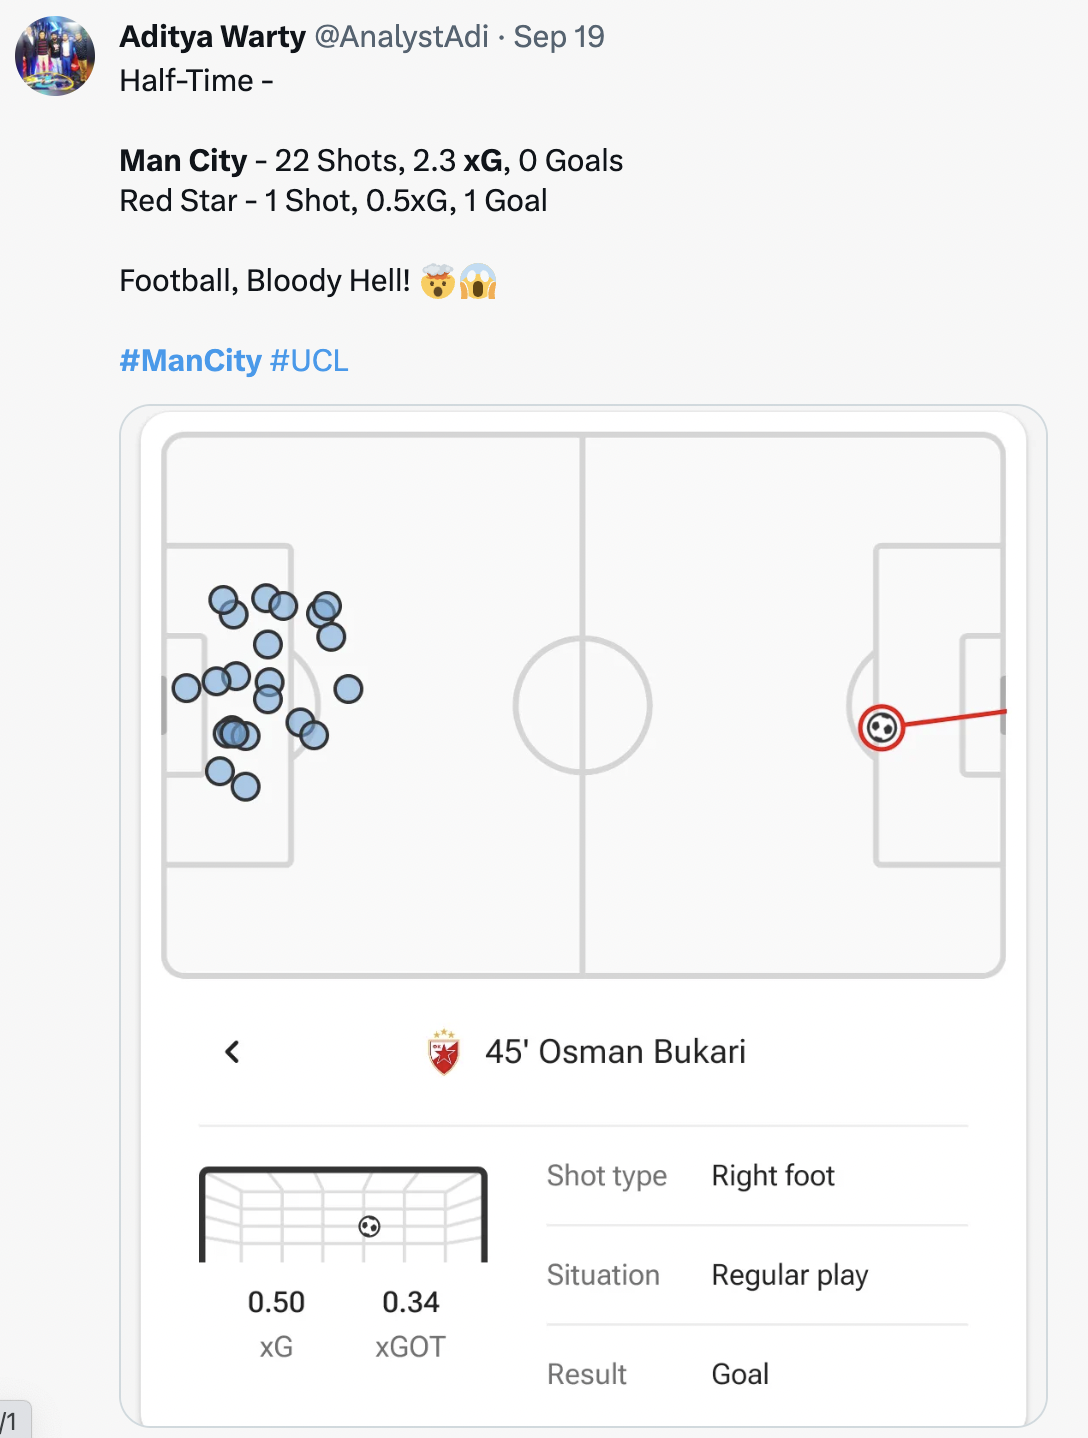

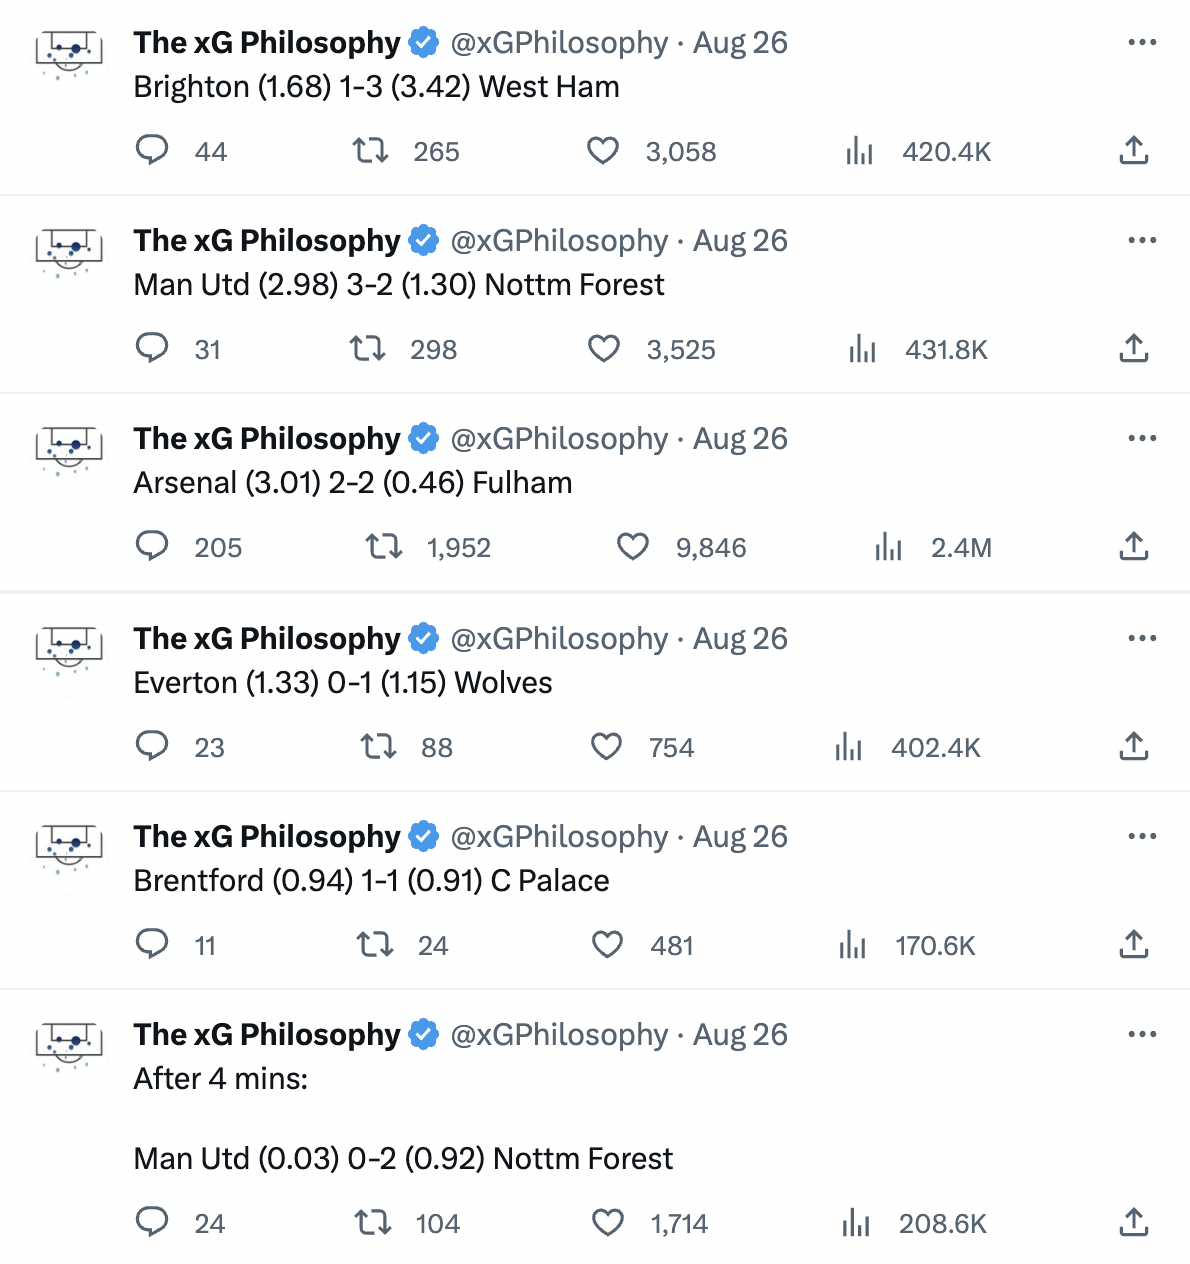

+ Using xG to assess a teams' performance across a season: [link](https://youtu.be/zlog5yTravc?si=zvACghfAVLP5Fqkg)

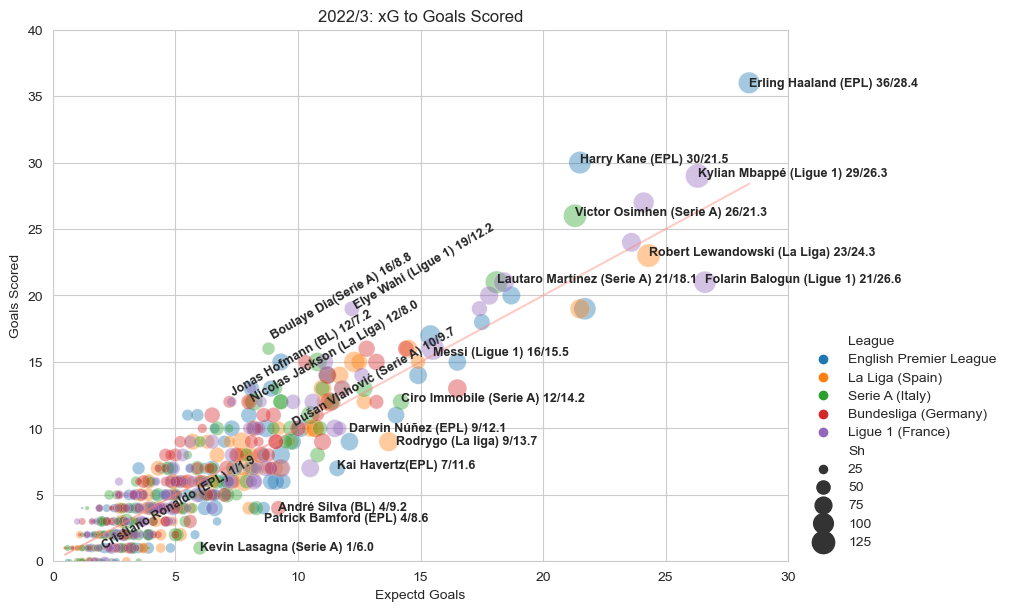

In [23]:
#player = select_xg['Player']
#high_g_xg = select_xg.sort_values(by="G-xG",ascending=False).groupby("League").first().reset_index()

plt.figure(figsize=(10,6),layout='constrained')
sns.set_style('whitegrid')
plt.xlabel('Expectd Goals') 
plt.ylabel('Goals Scored')
plt.axis([0, 30, 0, 40])
#plt.xticks(rotation=15)

sns.scatterplot(data=select_xg,
                x='xG',
                y='Gls', 
                size='Sh',
                sizes=(1, 300),
                alpha = 0.4, 
                palette= 'tab10',
                hue='League').set(title='2022/3: xG to Goals Scored');
sns.lineplot(data=select_xg, x = 'xG', y = 'xG', color = 'salmon', alpha = 0.4);


#for i in player:
#    x_cor = (high_g_xg.loc[high_g_xg['Player']== i, ['xG']].values[0])
#    y_cor = (high_g_xg.loc[high_g_xg['Player']== i, ['Gls']].values[0])
#    plt.text(s = i, x = x_cor, y = y_cor, fontsize =9, weight = 'bold')


## High Performers
plt.text(s = 'Jonas Hofmann (BL) 12/7.2', x = 7.2, y = 12.5, fontsize =9, weight = 'bold', rotation=30)
plt.text(s = 'Harry Kane (EPL) 30/21.5', x = 21.5, y = 30.0, fontsize =9, weight = 'bold')
plt.text(s = 'Nicolas Jackson (La Liga) 12/8.0', x = 8.0, y = 12.0, fontsize =9, weight = 'bold', rotation=30)
plt.text(s = 'Elye Wahi (Ligue 1) 19/12.2', x = 12.2, y = 19.0, fontsize =9, weight = 'bold', rotation=30)
plt.text(s = 'Boulaye Dia(Serie A) 16/8.8', x = 8.8, y = 16.8, fontsize =9, weight = 'bold', rotation=30)

## Low Performers
plt.text(s = 'André Silva (BL) 4/9.2', x = 9.2, y = 3.8, fontsize =9, weight = 'bold')
plt.text(s = 'Patrick Bamford (EPL) 4/8.6', x = 8.6, y = 3, fontsize =9, weight = 'bold')
plt.text(s = 'Rodrygo (La liga) 9/13.7', x = 14, y = 8.8, fontsize =9, weight = 'bold')
plt.text(s = 'Folarin Balogun (Ligue 1) 21/26.6', x = 26.6, y = 21, fontsize =9, weight = 'bold')
plt.text(s = 'Kevin Lasagna (Serie A) 1/6.0', x = 6.0, y = 0.8, fontsize =9, weight = 'bold')

## Selected Players
#epl
plt.text(s = 'Erling Haaland (EPL) 36/28.4', x = 28.4, y = 35.7, fontsize =9, weight = 'bold')
plt.text(s = 'Darwin Núñez (EPL) 9/12.1', x = 12.1, y = 9.8, fontsize =9, weight = 'bold')
plt.text(s = 'Kai Havertz(EPL) 7/11.6', x = 11.6, y = 7, fontsize =9, weight = 'bold')
plt.text(s = 'Cristiano Ronaldo (EPL) 1/1.9', x = 1.9, y = 1, fontsize =9, weight = 'bold', rotation=30)
#la liga
plt.text(s = 'Robert Lewandowski (La Liga) 23/24.3', x = 24.3, y = 23, fontsize =9, weight = 'bold')
#ligue 1
plt.text(s = 'Kylian Mbappé (Ligue 1) 29/26.3', x = 26.3, y = 29, fontsize =9, weight = 'bold')
plt.text(s = 'Messi (Ligue 1) 16/15.5', x = 15.5, y = 15.5, fontsize =9, weight = 'bold')
#serie A
plt.text(s = 'Victor Osimhen (Serie A) 26/21.3', x = 21.3, y = 26, fontsize =9, weight = 'bold')
plt.text(s = 'Lautaro Martínez (Serie A) 21/18.1', x = 18.1, y = 21, fontsize =9, weight = 'bold')
plt.text(s = 'Ciro Immobile (Serie A) 12/14.2', x = 14.2, y = 12, fontsize =9, weight = 'bold')
plt.text(s = 'Dušan Vlahović (Serie A) 10/9.7', x = 9.7, y = 10.2, fontsize =9, weight = 'bold', rotation=30)

plt.legend(bbox_to_anchor=(1.3, 0.45), frameon=False, fontsize=10,labelspacing=0.4);

In [24]:
# High chance converters in each league

high_g_xg = select_xg.sort_values(by="G-xG",ascending=False).groupby("League").first().reset_index()
high_g_xg

,League,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Season
0,Bundesliga (Germany),Jonas Hofmann,Germany,"FW,MF",M'Gladbach,30.0,1992.0,29.8,12.0,44.0,...,19.0,5.0,0.0,1.0,7.2,6.6,0.15,4.8,5.4,2022/3
1,English Premier League,Harry Kane,England,FW,Tottenham,29.0,1993.0,37.8,30.0,124.0,...,16.0,3.0,5.0,6.0,21.5,16.7,0.13,8.5,8.3,2022/3
2,La Liga (Spain),Nicolas Jackson,Senegal,FW,Villarreal,21.0,2001.0,17.8,12.0,41.0,...,13.4,0.0,0.0,0.0,8.0,8.0,0.20,4.0,4.0,2022/3
3,Ligue 1 (France),Elye Wahi,France,FW,Montpellier,19.0,2003.0,27.9,19.0,62.0,...,14.5,1.0,1.0,1.0,12.2,11.4,0.18,6.8,6.6,2022/3
4,Serie A (Italy),Boulaye Dia,Senegal,"FW,MF",Salernitana,25.0,1996.0,28.0,16.0,47.0,...,15.0,0.0,1.0,1.0,8.8,8.0,0.17,7.2,7.0,2022/3


In [25]:
# Low chance converters in each league

low_g_xg = select_xg.sort_values(by="G-xG",ascending=True).groupby("League").first().reset_index()
low_g_xg

,League,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Season
0,Bundesliga (Germany),André Silva,Portugal,FW,RB Leipzig,26.0,1995.0,19.3,4.0,60.0,...,13.5,0.0,0.0,0.0,9.2,9.2,0.15,-5.2,-5.2,2022/3
1,English Premier League,Patrick Bamford,England,FW,Leeds United,28.0,1993.0,16.8,4.0,48.0,...,14.7,1.0,0.0,2.0,8.6,7.0,0.15,-4.6,-3.0,2022/3
2,La Liga (Spain),Rodrygo,Brazil,"FW,MF",Real Madrid,21.0,2001.0,26.4,9.0,97.0,...,16.6,8.0,1.0,1.0,13.7,12.9,0.13,-4.7,-4.9,2022/3
3,Ligue 1 (France),Folarin Balogun,USA,FW,Reims,21.0,2001.0,33.3,21.0,121.0,...,15.2,2.0,6.0,7.0,26.6,21.0,0.18,-5.6,-6.0,2022/3
4,Serie A (Italy),Kevin Lasagna,Italy,"FW,MF",Hellas Verona,29.0,1992.0,17.5,1.0,52.0,...,18.2,0.0,0.0,0.0,6.0,6.0,0.12,-5.0,-5.0,2022/3


In [26]:
# Players of interest

select_xg[(select_xg['Player']=='Lionel Messi')|
          (select_xg['Player']=='Kylian Mbappé')|
          (select_xg['Player']=='Cristiano Ronaldo')|
          (select_xg['Player']=='Erling Haaland')|
          (select_xg['Player']=='Robert Lewandowski')|
          (select_xg['Player']=='Kai Havertz')|
          (select_xg['Player']=='Darwin Núñez')|
          (select_xg['Player']=='Victor Osimhen')|
          (select_xg['Player']=='Lautaro Martínez')|
          (select_xg['Player']=='Ciro Immobile')|
          (select_xg['Player']=='Dušan Vlahović')]

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,League,Season
0,Erling Haaland,Norway,FW,Manchester City,22.0,2000.0,30.8,36.0,116.0,53.0,...,0.0,7.0,7.0,28.4,23.1,0.20,7.6,5.9,English Premier League,2022/3
10,Darwin Núñez,Uruguay,FW,Liverpool,23.0,1999.0,18.8,9.0,84.0,35.0,...,0.0,0.0,0.0,12.1,12.1,0.14,-3.1,-3.1,English Premier League,2022/3
11,Kai Havertz,Germany,"FW,MF",Chelsea,23.0,1999.0,28.5,7.0,70.0,31.0,...,1.0,1.0,1.0,11.6,10.8,0.15,-4.6,-4.8,English Premier League,2022/3
166,Cristiano Ronaldo,Portugal,FW,Manchester Utd,37.0,1985.0,5.8,1.0,25.0,6.0,...,1.0,0.0,0.0,1.9,1.9,0.08,-0.9,-0.9,English Premier League,2022/3
569,Robert Lewandowski,Poland,FW,Barcelona,33.0,1988.0,31.6,23.0,134.0,56.0,...,5.0,0.0,1.0,24.3,23.5,0.18,-1.3,-0.5,La Liga (Spain),2022/3
1188,Victor Osimhen,Nigeria,FW,Napoli,23.0,1998.0,28.5,26.0,132.0,52.0,...,1.0,2.0,3.0,21.3,18.9,0.14,4.7,5.1,Serie A (Italy),2022/3
1189,Lautaro Martínez,Argentina,FW,Inter,24.0,1997.0,28.6,21.0,125.0,51.0,...,0.0,1.0,2.0,18.1,16.5,0.14,2.9,3.5,Serie A (Italy),2022/3
1190,Ciro Immobile,Italy,FW,Lazio,32.0,1990.0,24.7,12.0,72.0,30.0,...,0.0,4.0,5.0,14.2,10.3,0.14,-2.2,-2.3,Serie A (Italy),2022/3
1199,Dušan Vlahović,Serbia,FW,Juventus,22.0,2000.0,21.4,10.0,65.0,20.0,...,4.0,2.0,3.0,9.7,7.3,0.11,0.3,0.7,Serie A (Italy),2022/3
2331,Kylian Mbappé,France,FW,Paris S-G,23.0,1998.0,31.3,29.0,144.0,73.0,...,1.0,3.0,5.0,26.3,22.2,0.15,2.7,3.8,Ligue 1 (France),2022/3


In [28]:
select_xg.sort_values('G-xG', ascending=False).tail(10)

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,League,Season
592,Yeremi Pino,Spain,"FW,MF",Villarreal,19.0,2002.0,27.2,4.0,50.0,19.0,...,0.0,0.0,0.0,8.0,8.0,0.16,-4.0,-4.0,La Liga (Spain),2022/3
26,Eddie Nketiah,England,FW,Arsenal,23.0,1999.0,12.1,4.0,41.0,14.0,...,0.0,0.0,0.0,8.2,8.2,0.20,-4.2,-4.2,English Premier League,2022/3
1206,Krzysztof Piątek,Poland,FW,Salernitana,27.0,1995.0,23.8,4.0,57.0,19.0,...,1.0,1.0,1.0,8.3,7.6,0.13,-4.3,-4.6,Serie A (Italy),2022/3
23,Patrick Bamford,England,FW,Leeds United,28.0,1993.0,16.8,4.0,48.0,16.0,...,1.0,0.0,2.0,8.6,7.0,0.15,-4.6,-3.0,English Premier League,2022/3
11,Kai Havertz,Germany,"FW,MF",Chelsea,23.0,1999.0,28.5,7.0,70.0,31.0,...,1.0,1.0,1.0,11.6,10.8,0.15,-4.6,-4.8,English Premier League,2022/3
573,Rodrygo,Brazil,"FW,MF",Real Madrid,21.0,2001.0,26.4,9.0,97.0,31.0,...,8.0,1.0,1.0,13.7,12.9,0.13,-4.7,-4.9,La Liga (Spain),2022/3
1227,Kevin Lasagna,Italy,"FW,MF",Hellas Verona,29.0,1992.0,17.5,1.0,52.0,11.0,...,0.0,0.0,0.0,6.0,6.0,0.12,-5.0,-5.0,Serie A (Italy),2022/3
1827,André Silva,Portugal,FW,RB Leipzig,26.0,1995.0,19.3,4.0,60.0,22.0,...,0.0,0.0,0.0,9.2,9.2,0.15,-5.2,-5.2,Bundesliga (Germany),2022/3
2330,Folarin Balogun,USA,FW,Reims,21.0,2001.0,33.3,21.0,121.0,50.0,...,2.0,6.0,7.0,26.6,21.0,0.18,-5.6,-6.0,Ligue 1 (France),2022/3
2329,Omar Marmoush,Egypt,FW,Wolfsburg,23.0,1999.0,16.4,5.0,48.0,17.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Bundesliga (Germany),2022/3
